In [13]:
!python -m pip install "../."

Processing c:\users\danii\program\python\project\imgdoc
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imgdoc: filename=imgdoc-0.0.4-py3-none-any.whl size=12317 sha256=3e0af86415f3d5bd9d63967819d4f8f275158632b8ea8672397008f479706a23
  Stored in directory: C:\Users\danii\AppData\Local\Temp\pip-ephem-wheel-cache-p48bgzc2\wheels\b8\e3\4a\f1f494124c2259921bd58533df69bb605814dcc87a7223eb4d
Successfully built imgdoc
  Attempting uninstall: imgdoc
    Found existing installation: imgdoc 0.0.4
    Uninstalling imgdoc-0.0.4:
      Successfully uninstalled imgdoc-0.0.4


In [1]:
import pytesseract
from img_doc.extractors.word_extractors import BaseWordExtractor
from img_doc.data_structures import Word
import numpy as np
from typing import List

class TesseractWordExtractor(BaseWordExtractor):
    def extract_from_img(self, img: np) -> List[Word]:
        tesseract_bboxes = pytesseract.image_to_data(
            config="-l rus",
            image=img,
            output_type=pytesseract.Output.DICT)
        word_list = []
        for index_bbox, level in enumerate(tesseract_bboxes["level"]):
            if level == 5:
                word = Word(text = tesseract_bboxes["text"][index_bbox])
                word.set_point_and_size({
                    "x_top_left":tesseract_bboxes["left"][index_bbox],
                    "y_top_left":tesseract_bboxes["top"][index_bbox],
                    "width":tesseract_bboxes["width"][index_bbox],
                    "height": tesseract_bboxes["height"][index_bbox],
                })
                word_list.append(word)
        return word_list

In [50]:
from img_doc.data_structures import Image
import os

image = Image()
image.set_img_from_path(os.path.join("img", "4.jpg"))

word_ext = TesseractWordExtractor()
words = word_ext.extract_from_img(image.img)
print(words)

[<img_doc.data_structures.document.word.Word object at 0x00000211F1059360>, <img_doc.data_structures.document.word.Word object at 0x00000211F0BFF2B0>, <img_doc.data_structures.document.word.Word object at 0x00000211F003E8F0>, <img_doc.data_structures.document.word.Word object at 0x00000211F003E710>, <img_doc.data_structures.document.word.Word object at 0x00000211F009BE50>, <img_doc.data_structures.document.word.Word object at 0x00000211EFCE3AF0>, <img_doc.data_structures.document.word.Word object at 0x00000211F0B6A3E0>, <img_doc.data_structures.document.word.Word object at 0x00000211F0B77D90>, <img_doc.data_structures.document.word.Word object at 0x00000211F0B74250>, <img_doc.data_structures.document.word.Word object at 0x00000211F0CBA950>, <img_doc.data_structures.document.word.Word object at 0x00000211F0CBB400>, <img_doc.data_structures.document.word.Word object at 0x00000211F0CB9D50>, <img_doc.data_structures.document.word.Word object at 0x00000211F0CB9720>, <img_doc.data_structures

In [51]:
from img_doc.extractors.block_extractors.block_extractor_from_word import KMeanBlockExtractor
kmeanext = KMeanBlockExtractor()


[<img_doc.data_structures.document.block.Block object at 0x00000211F009B7C0>, <img_doc.data_structures.document.block.Block object at 0x00000211F345EE90>, <img_doc.data_structures.document.block.Block object at 0x00000211F345EF50>, <img_doc.data_structures.document.block.Block object at 0x00000211F345F010>, <img_doc.data_structures.document.block.Block object at 0x00000211F345F0D0>, <img_doc.data_structures.document.block.Block object at 0x00000211F345F190>, <img_doc.data_structures.document.block.Block object at 0x00000211F345F250>, <img_doc.data_structures.document.block.Block object at 0x00000211F345F310>, <img_doc.data_structures.document.block.Block object at 0x00000211F345F3D0>, <img_doc.data_structures.document.block.Block object at 0x00000211F345F490>, <img_doc.data_structures.document.block.Block object at 0x00000211F345F550>, <img_doc.data_structures.document.block.Block object at 0x00000211F345F610>, <img_doc.data_structures.document.block.Block object at 0x00000211F345F6D0>

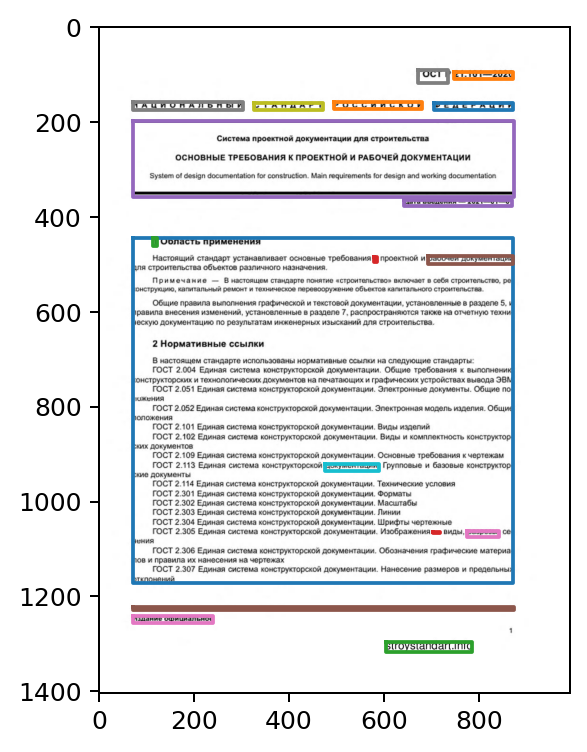

In [52]:
import matplotlib.pyplot as plt

color = ["g", "y", "k", "r"]
plt.figure(dpi=180)
plt.imshow(image.img)

blocks = kmeanext.extract_from_word(words)
print(blocks)
for block in blocks:
    x0 = block.segment.x_top_left
    y0 = block.segment.y_top_left
    x1 = block.segment.x_bottom_right
    y1 = block.segment.y_bottom_right
    plt.plot([x0, x0, x1, x1, x0], [y0, y1, y1, y0, y0])

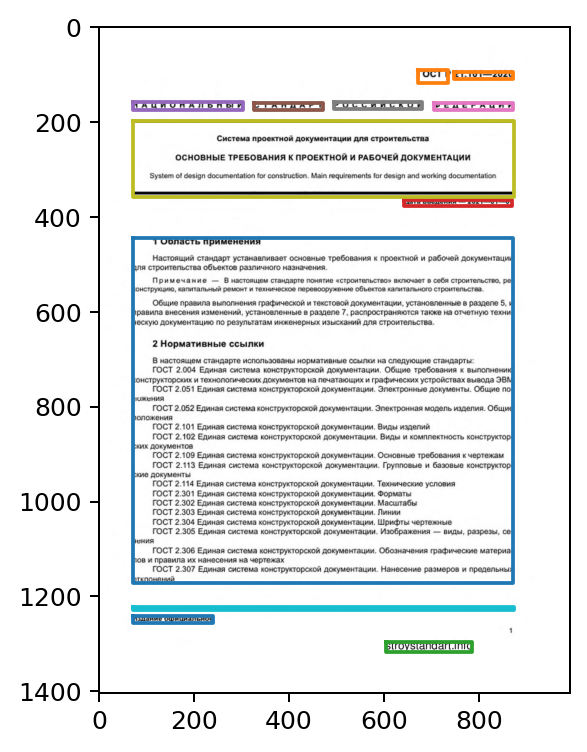

In [53]:
import matplotlib.pyplot as plt

color = ["g", "y", "k", "r"]
plt.figure(dpi=180)
plt.imshow(image.img)

blocks2 = kmeanext.join_intersect_blocks(blocks)
for block in blocks2:
    x0 = block.segment.x_top_left
    y0 = block.segment.y_top_left
    x1 = block.segment.x_bottom_right
    y1 = block.segment.y_bottom_right
    plt.plot([x0, x0, x1, x1, x0], [y0, y1, y1, y0, y0])